# Stiff ODE: Forward Euler with variable step

Consider the stiff ODE
$$
y' = -100(y - \sin(t)), \qquad t \ge 0
$$
$$
y(0) = 1
$$
The exact solution is
$$
y(t) = \frac{10101}{10001}e^{-100t} - \frac{100}{10001}(\cos t - 100 \sin t)
$$

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from matplotlib import pyplot as plt

The next two functions implement the right hand side of the ode and the exact solution.

In [14]:
def f(t,y):
    return -100.0*(y - np.sin(t))

def yexact(t):
    return 10101.0*np.exp(-100*t)/10001.0 - 100.0*(np.cos(t) - 100.0*np.sin(t))/10001.0

## Forward Euler

$$
y_n = y_{n-1} - 100 h [ y_{n-1} - \sin(t_{n-1})]
$$
We start with a step size of $h=0.001$ until $t=0.1$ after which we increase it to $h=0.02$.

In [15]:
def ForwardEuler(t0,y0,T):
    t, y = [], []
    t.append(t0)
    y.append(y0)
    h = 0.001
    n = 1
    while t[n-1]+h <= T:
        if t[n-1] > 0.1:
            h = 0.02
        y.append(y[n-1] + h*f(t[n-1],y[n-1]))
        t.append(t[n-1] + h)
        n += 1
    return np.array(t),np.array(y)

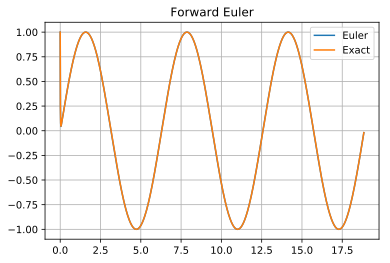

In [16]:
t0, y0 = 0.0, 1.0
T  = 6*np.pi
t,y = ForwardEuler(t0,y0,T)

plt.plot(t,y,t,yexact(t))
plt.title("Forward Euler")
plt.grid(True)
plt.legend(("Euler","Exact"));